# KickStarter Campaigns

Background of data used - Analysis of data - Machine learning model take #1 - Machine learning model take #2

Data per Kaggle, campaigns launched from June 2009 to December 2017: https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv

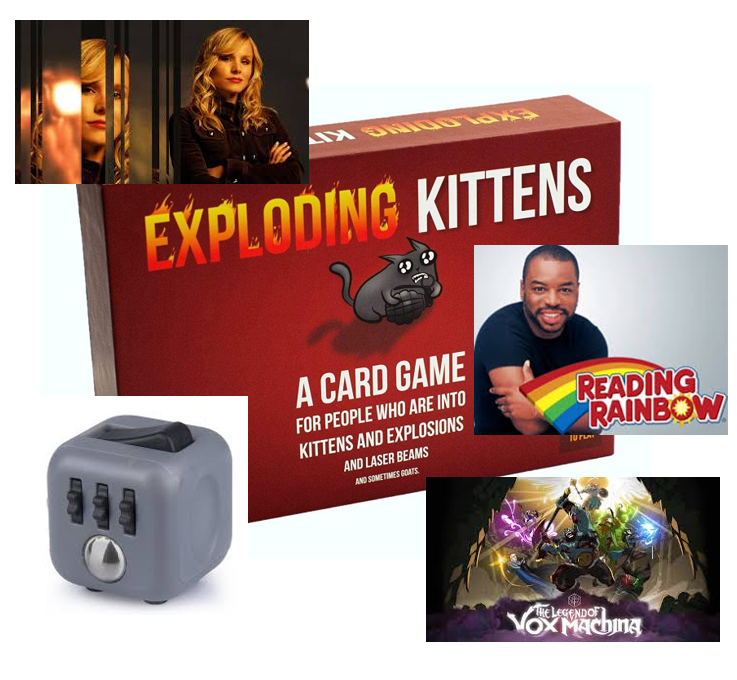

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Data per Kaggle
df = pd.read_csv('ks-projects-201801.csv')
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal         launched  \
0          Poetry    Publishing      GBP  10/9/2015   1000.0  8/11/2015 12:12   
1  Narrative Film  Film & Video      USD  11/1/2017  30000.0    9/2/2017 4:43   
2  Narrative Film  Film & Video      USD  2/26/2013  45000.0   1/12/2013 0:20   
3           Music         Music      USD  4/16/2012   5000.0   3/17/2012 3:24   
4    Film & Video  Film & Video      USD  8/29/2015  19500.0    7/4/2015 8:35   

   pledged     state  backers country  usd pledged  usd_pledged_real  \
0      0.0    failed        0      GB          0.0               0.0   
1   2421.0    failed       15      US        100.0            2421.0   
2    220.0    failed        3      US        220.0             220.0   
3      1.0    failed        1      US          1.0               1.0   
4   1283.0  canceled       14      US       1283.0            1283.0   

   usd_goal_real  
0        1533.95  
1       30000.00  
2       45000.00  
3        5000.00  
4       19500.00

In [3]:
df2 = df.drop(columns = ["ID", "name", "category", "goal", "pledged", "usd pledged", "currency", "country"])
df2.head()

main_category   deadline         launched     state  backers  \
0    Publishing  10/9/2015  8/11/2015 12:12    failed        0   
1  Film & Video  11/1/2017    9/2/2017 4:43    failed       15   
2  Film & Video  2/26/2013   1/12/2013 0:20    failed        3   
3         Music  4/16/2012   3/17/2012 3:24    failed        1   
4  Film & Video  8/29/2015    7/4/2015 8:35  canceled       14   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [4]:
df3 = df2[(df2.state == "failed") | (df2.state == "successful")]
df3.head()

main_category   deadline         launched       state  backers  \
0    Publishing  10/9/2015  8/11/2015 12:12      failed        0   
1  Film & Video  11/1/2017    9/2/2017 4:43      failed       15   
2  Film & Video  2/26/2013   1/12/2013 0:20      failed        3   
3         Music  4/16/2012   3/17/2012 3:24      failed        1   
5          Food   4/1/2016  2/26/2016 13:38  successful      224   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
5           52375.0       50000.00

In [5]:
df3["deadline"] = pd.to_datetime(df3["deadline"])
df3["launched"] = pd.to_datetime(df3["launched"])

C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# New column for duration
df3["duration"] = df3["deadline"] - df3["launched"]
df3.head()

C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


main_category   deadline            launched       state  backers  \
0    Publishing 2015-10-09 2015-08-11 12:12:00      failed        0   
1  Film & Video 2017-11-01 2017-09-02 04:43:00      failed       15   
2  Film & Video 2013-02-26 2013-01-12 00:20:00      failed        3   
3         Music 2012-04-16 2012-03-17 03:24:00      failed        1   
5          Food 2016-04-01 2016-02-26 13:38:00  successful      224   

   usd_pledged_real  usd_goal_real         duration  
0               0.0        1533.95 58 days 11:48:00  
1            2421.0       30000.00 59 days 19:17:00  
2             220.0       45000.00 44 days 23:40:00  
3               1.0        5000.00 29 days 20:36:00  
5           52375.0       50000.00 34 days 10:22:00

In [7]:
# Positive values went beyond goal; negative values did not reach goal
df3["balance"] = df3["usd_pledged_real"] - df3["usd_goal_real"]
df3.head()

C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


main_category   deadline            launched       state  backers  \
0    Publishing 2015-10-09 2015-08-11 12:12:00      failed        0   
1  Film & Video 2017-11-01 2017-09-02 04:43:00      failed       15   
2  Film & Video 2013-02-26 2013-01-12 00:20:00      failed        3   
3         Music 2012-04-16 2012-03-17 03:24:00      failed        1   
5          Food 2016-04-01 2016-02-26 13:38:00  successful      224   

   usd_pledged_real  usd_goal_real         duration   balance  
0               0.0        1533.95 58 days 11:48:00  -1533.95  
1            2421.0       30000.00 59 days 19:17:00 -27579.00  
2             220.0       45000.00 44 days 23:40:00 -44780.00  
3               1.0        5000.00 29 days 20:36:00  -4999.00  
5           52375.0       50000.00 34 days 10:22:00   2375.00

In [ ]:
# Export combined file
# df3.to_csv("kickstarter_2018_revised.csv")

Text(0.5, 1.0, 'Number of Campaigns by Category')

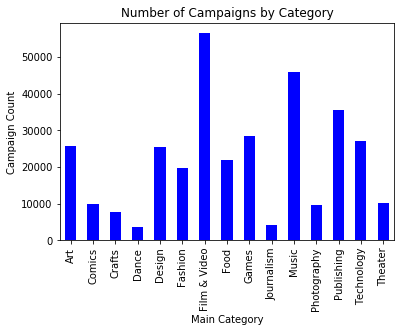

In [25]:
# Count of projects by mcolor = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique()))main_category
df3.groupby('main_category').main_category.count().plot(kind='bar', color="b")
plt.xlabel("Main Category")
plt.ylabel("Campaign Count")
plt.title("Number of Campaigns by Category")

Text(0.5, 1.0, 'Median Number of Backers for Successful/Failed Campaigns')

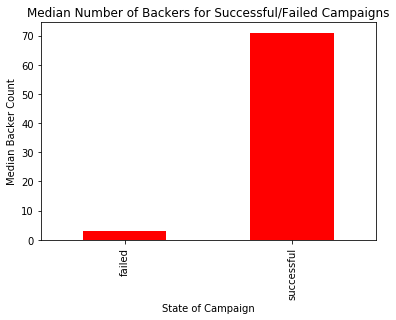

In [24]:
df3.groupby("state").backers.median().plot(kind='bar', color="r")
plt.xlabel("State of Campaign")
plt.ylabel("Median Backer Count")
plt.title("Median Number of Backers for Successful/Failed Campaigns")

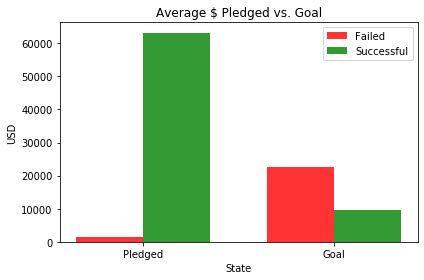

In [26]:
# data to plot
n_groups = 2

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)

pledged = df3.groupby("state").usd_pledged_real.mean()
real = df3.groupby("state").usd_goal_real.mean()

bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, pledged, bar_width, alpha=opacity, color='r', label='Failed')
rects2 = plt.bar(index + bar_width, real, bar_width, alpha=opacity, color='g', label='Successful')

plt.xlabel('State')
plt.ylabel('USD')
plt.title('Average $ Pledged vs. Goal')
plt.xticks(index + (bar_width/2), ('Pledged', 'Goal'))
plt.legend()
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Balance')

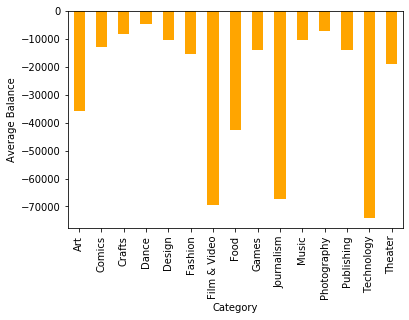

In [27]:
df3.groupby("main_category").balance.mean().plot(kind='bar', color="orange")
plt.xlabel("Category")
plt.ylabel("Average Balance")

In [8]:
# Duration: small 0 to 30, medium 31 to 60, large 61 to 90 (max set by Kickstarter)
conditions1 = [
    (df3["duration"] == "0 days") | (df3["duration"] <= "30 days"),
    (df3["duration"] == "31 days") | (df3["duration"] <= "60 days"),
    (df3["duration"] >= "61 days")]

choices1 = ["small", "medium", "large"]

df3["duration_group"] = np.select(conditions1, choices1)
df3.head()

C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


main_category   deadline            launched       state  backers  \
0    Publishing 2015-10-09 2015-08-11 12:12:00      failed        0   
1  Film & Video 2017-11-01 2017-09-02 04:43:00      failed       15   
2  Film & Video 2013-02-26 2013-01-12 00:20:00      failed        3   
3         Music 2012-04-16 2012-03-17 03:24:00      failed        1   
5          Food 2016-04-01 2016-02-26 13:38:00  successful      224   

   usd_pledged_real  usd_goal_real         duration   balance duration_group  
0               0.0        1533.95 58 days 11:48:00  -1533.95         medium  
1            2421.0       30000.00 59 days 19:17:00 -27579.00         medium  
2             220.0       45000.00 44 days 23:40:00 -44780.00         medium  
3               1.0        5000.00 29 days 20:36:00  -4999.00          small  
5           52375.0       50000.00 34 days 10:22:00   2375.00         medium

In [9]:
# Goal original: small 0 to 5,000, medium 5,001 to 50,000, large 50,001 to 99,999, xlarge 100,000+ --> train/test score of ~0.86
# Goal revised: small 0 to 3,000, medium 3,001 to 5,000, large 5,001 to 8,000, xlarge 8,001+ --> train/test score of ~0.87
conditions2 = [
    (df3["usd_goal_real"] == 0) | (df3["usd_goal_real"] <= 3000),
    (df3["usd_goal_real"] == 3001) | (df3["usd_goal_real"] <= 5000),
    (df3["usd_goal_real"] == 5001)| (df3["usd_goal_real"] <= 8000),
    (df3["usd_goal_real"] >= 8001)]

choices2 = ["small", "medium", "large", "xlarge"]

df3["goal_group"] = np.select(conditions2, choices2)
df3.head()

C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


main_category   deadline            launched       state  backers  \
0    Publishing 2015-10-09 2015-08-11 12:12:00      failed        0   
1  Film & Video 2017-11-01 2017-09-02 04:43:00      failed       15   
2  Film & Video 2013-02-26 2013-01-12 00:20:00      failed        3   
3         Music 2012-04-16 2012-03-17 03:24:00      failed        1   
5          Food 2016-04-01 2016-02-26 13:38:00  successful      224   

   usd_pledged_real  usd_goal_real         duration   balance duration_group  \
0               0.0        1533.95 58 days 11:48:00  -1533.95         medium   
1            2421.0       30000.00 59 days 19:17:00 -27579.00         medium   
2             220.0       45000.00 44 days 23:40:00 -44780.00         medium   
3               1.0        5000.00 29 days 20:36:00  -4999.00          small   
5           52375.0       50000.00 34 days 10:22:00   2375.00         medium   

  goal_group  
0      small  
1     xlarge  
2     xlarge  
3     medium  
5     xlarge

In [ ]:
# Balance: small <=0, medium 1 to 100,000, large 100,001+
# conditions3 = [
#     (df3["balance"] <= 0),
#     (df3["balance"] == 1) | (df3["balance"] <= 100000),
#     (df3["balance"] > 100000)]

# choices3 = ["small", "medium", "large"]

# df3["balance_group"] = np.select(conditions3, choices3)
# df3.head()

In [10]:
# Backers original: small <1000, medium 1,000 to 9,999, large 10,000+ --> train/test score of ~0.65
# Backers revised: small <15, medium 15 to 200, large 201+ --> train/test score ~0.86
conditions4 = [
    (df3["backers"] < 15),
    (df3["backers"] == 15) | (df3["backers"] <= 200),
    (df3["backers"] > 200)]

choices4 = ["small", "medium", "large"]

df3["backers_group"] = np.select(conditions4, choices4)
df3.head()

C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


main_category   deadline            launched       state  backers  \
0    Publishing 2015-10-09 2015-08-11 12:12:00      failed        0   
1  Film & Video 2017-11-01 2017-09-02 04:43:00      failed       15   
2  Film & Video 2013-02-26 2013-01-12 00:20:00      failed        3   
3         Music 2012-04-16 2012-03-17 03:24:00      failed        1   
5          Food 2016-04-01 2016-02-26 13:38:00  successful      224   

   usd_pledged_real  usd_goal_real         duration   balance duration_group  \
0               0.0        1533.95 58 days 11:48:00  -1533.95         medium   
1            2421.0       30000.00 59 days 19:17:00 -27579.00         medium   
2             220.0       45000.00 44 days 23:40:00 -44780.00         medium   
3               1.0        5000.00 29 days 20:36:00  -4999.00          small   
5           52375.0       50000.00 34 days 10:22:00   2375.00         medium   

  goal_group backers_group  
0      small         small  
1     xlarge        medium  
2     xlarge         small  
3     medium         small  
5     xlarge         large

In [11]:
df3["launched_month"] = df3["launched"].dt.strftime("%m")
df3["launched_year"] = df3["launched"].dt.strftime("%Y")
df3.head()

C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


main_category   deadline            launched       state  backers  \
0    Publishing 2015-10-09 2015-08-11 12:12:00      failed        0   
1  Film & Video 2017-11-01 2017-09-02 04:43:00      failed       15   
2  Film & Video 2013-02-26 2013-01-12 00:20:00      failed        3   
3         Music 2012-04-16 2012-03-17 03:24:00      failed        1   
5          Food 2016-04-01 2016-02-26 13:38:00  successful      224   

   usd_pledged_real  usd_goal_real         duration   balance duration_group  \
0               0.0        1533.95 58 days 11:48:00  -1533.95         medium   
1            2421.0       30000.00 59 days 19:17:00 -27579.00         medium   
2             220.0       45000.00 44 days 23:40:00 -44780.00         medium   
3               1.0        5000.00 29 days 20:36:00  -4999.00          small   
5           52375.0       50000.00 34 days 10:22:00   2375.00         medium   

  goal_group backers_group launched_month launched_year  
0      small         small             08          2015  
1     xlarge        medium             09          2017  
2     xlarge         small             01          2013  
3     medium         small             03          2012  
5     xlarge         large             02          2016

In [12]:
# Lauched date seasons: Spring/Q2 = April to June, Summer/Q3 = July to September, Fall/Q4 = October to December, Winter/Q1 = January to March
conditions5 = [
    (df3["launched_month"] == "04") | (df3["launched_month"] <= "06"),
    (df3["launched_month"] == "07") | (df3["launched_month"] <= "09"),
    (df3["launched_month"] == "10") | (df3["launched_month"] <= "12"),
    (df3["launched_month"] == "01") | (df3["launched_month"] <= "03")]

choices5 = ["Q2", "Q3", "Q4", "Q1"]

df3["launched_quarter"] = np.select(conditions5, choices5)
df3.head()

C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


main_category   deadline            launched       state  backers  \
0    Publishing 2015-10-09 2015-08-11 12:12:00      failed        0   
1  Film & Video 2017-11-01 2017-09-02 04:43:00      failed       15   
2  Film & Video 2013-02-26 2013-01-12 00:20:00      failed        3   
3         Music 2012-04-16 2012-03-17 03:24:00      failed        1   
5          Food 2016-04-01 2016-02-26 13:38:00  successful      224   

   usd_pledged_real  usd_goal_real         duration   balance duration_group  \
0               0.0        1533.95 58 days 11:48:00  -1533.95         medium   
1            2421.0       30000.00 59 days 19:17:00 -27579.00         medium   
2             220.0       45000.00 44 days 23:40:00 -44780.00         medium   
3               1.0        5000.00 29 days 20:36:00  -4999.00          small   
5           52375.0       50000.00 34 days 10:22:00   2375.00         medium   

  goal_group backers_group launched_month launched_year launched_quarter  
0      small         small             08          2015               Q3  
1     xlarge        medium             09          2017               Q3  
2     xlarge         small             01          2013               Q2  
3     medium         small             03          2012               Q2  
5     xlarge         large             02          2016               Q2

In [13]:
df4 = pd.get_dummies(df3, prefix= ['state', 'main_category', 'duration_group', 'goal_group', 'backers_group', 'launched_year', 'launched_quarter'], 
               columns= ['state', 'main_category', 'duration_group', 'goal_group', 'backers_group', 'launched_year', 'launched_quarter'])
df4.head()

deadline            launched  backers  usd_pledged_real  usd_goal_real  \
0 2015-10-09 2015-08-11 12:12:00        0               0.0        1533.95   
1 2017-11-01 2017-09-02 04:43:00       15            2421.0       30000.00   
2 2013-02-26 2013-01-12 00:20:00        3             220.0       45000.00   
3 2012-04-16 2012-03-17 03:24:00        1               1.0        5000.00   
5 2016-04-01 2016-02-26 13:38:00      224           52375.0       50000.00   

          duration   balance launched_month  state_failed  state_successful  \
0 58 days 11:48:00  -1533.95             08             1                 0   
1 59 days 19:17:00 -27579.00             09             1                 0   
2 44 days 23:40:00 -44780.00             01             1                 0   
3 29 days 20:36:00  -4999.00             03             1                 0   
5 34 days 10:22:00   2375.00             02             0                 1   

   ...  launched_year_2011  launched_year_2012  launched_year_2013  \
0  ...                   0                   0                   0   
1  ...                   0                   0                   0   
2  ...                   0                   0                   1   
3  ...                   0                   1                   0   
5  ...                   0                   0                   0   

   launched_year_2014  launched_year_2015  launched_year_2016  \
0                   0                   1                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
5                   0                   0                   1   

   launched_year_2017  launched_quarter_Q2  launched_quarter_Q3  \
0                   0                    0                    1   
1                   1                    0                    1   
2                   0                    1                    0   
3                   0                    1                    0   
5                   0                    1                    0   

   launched_quarter_Q4  
0                    0  
1                    0  
2                    0  
3                    0  
5                    0  

[5 rows x 49 columns]

In [14]:
df5 = df4.drop(columns = ["state_failed","deadline", "launched", "backers", "usd_pledged_real", 
                         "usd_goal_real", "duration", "balance", "launched_month"])
df5.head()

state_successful  main_category_Art  main_category_Comics  \
0                 0                  0                     0   
1                 0                  0                     0   
2                 0                  0                     0   
3                 0                  0                     0   
5                 1                  0                     0   

   main_category_Crafts  main_category_Dance  main_category_Design  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
5                     0                    0                     0   

   main_category_Fashion  main_category_Film & Video  main_category_Food  \
0                      0                           0                   0   
1                      0                           1                   0   
2                      0                           1                   0   
3                      0                           0                   0   
5                      0                           0                   1   

   main_category_Games  ...  launched_year_2011  launched_year_2012  \
0                    0  ...                   0                   0   
1                    0  ...                   0                   0   
2                    0  ...                   0                   0   
3                    0  ...                   0                   1   
5                    0  ...                   0                   0   

   launched_year_2013  launched_year_2014  launched_year_2015  \
0                   0                   0                   1   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   0                   0   
5                   0                   0                   0   

   launched_year_2016  launched_year_2017  launched_quarter_Q2  \
0                   0                   0                    0   
1                   0                   1                    0   
2                   0                   0                    1   
3                   0                   0                    1   
5                   1                   0                    1   

   launched_quarter_Q3  launched_quarter_Q4  
0                    1                    0  
1                    1                    0  
2                    0                    0  
3                    0                    0  
5                    0                    0  

[5 rows x 40 columns]

In [ ]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# number = LabelEncoder()
# df3["main_category_label"] = number.fit_transform(df3["main_category"].astype("str"))
# df3.head()

In [ ]:
# number = LabelEncoder()
# df3["duration_group_label"] = number.fit_transform(df3["duration_group"].astype("str"))
# df3.head()

In [ ]:
# number = LabelEncoder()
# df3["goal_group_label"] = number.fit_transform(df3["goal_group"].astype("str"))
# df3.head()

In [ ]:
# number = LabelEncoder()
# df3["backers_group_label"] = number.fit_transform(df3["backers_group"].astype("str"))
# df3.head()

In [ ]:
# df3.dtypes

In [15]:
X = df5.drop("state_successful", axis = 1 )
y = df5["state_successful"]

In [16]:
# Logistic regression model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
classifier.fit(X_train, y_train)

C:\Users\oconn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8712915467365612
Testing Data Score: 0.870560426440261


### Logistic Regression Analysis

Our first run only included groupings for state (successful/failed), category, campaign duration groupings, goal groupings, & backers groupings.  Using the original grouping amounts for duration, goal, & backers (noted above in the grouping cells) our training & testing data scores were ~0.60 using logistic regression. 

We added a further breakdown by the launched date: by quarter & by year.  Adding these details to the analysis improved our training & testing data scores from ~0.60 to ~0.65.

To improve our scores, we reexamined our groupings for duration, backers, and goal:

1) Duration is set by Kickstarter - max campaign of 90 days.  We felt the groupings by 30 days was sufficient.

2) For backers, our original groupings were: small <1000, medium 1,000 to 9,999 & large 10,000+.  We ran a bar chart to determine the median number of backers for failed & successful campaigns.  We found the median number of successful campaigns was less than 70, so we revised our groupinds to be much smaller.  Revised groups were small <15, medium 15 to 200 & large 201+.  Once we updated the groups our training & testing data score improved from ~0.65 to ~0.86.

3) Similar to backers, we found our original goal groupings were not representative of the data.  Our original groupings were small 0 to 5,000, medium 5,001 to 50,000, large 50,001 to 99,999 & x-large 100,000+.  We downsized our groupings to small 0 to 3,000, medium 3,001 to 5,000, large 5,001 to 8,000 & x-large 8,001+.  Once we updated the groups our training & testing data score improved from ~0.86 to ~0.87.

We tried some other revisions (example adding the launched month), but found our best scores hovered around ~0.87 using logistic regression.

In [20]:
# Test model - 25% of data (82,919 tested/331,675 total)
# Note: only maintained "state_successful" --> 1 = yes, successful, 0 = no, failed/not successful
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Prediction  Actual
345742           0       0
186281           0       0
101726           0       0
276924           0       0
82850            1       1
...            ...     ...
151103           1       1
327440           1       1
134845           0       0
184558           1       1
30170            1       0

[82919 rows x 2 columns]

In [21]:
# Logistic regression model results
# Top right 4,662 are false positives; bottom left 6,071 are false negatives
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     49458
           1       0.85      0.82      0.84     33461

    accuracy                           0.87     82919
   macro avg       0.87      0.86      0.86     82919
weighted avg       0.87      0.87      0.87     82919

[[44796  4662]
 [ 6071 27390]]


In [22]:
# Neural network
# Top right 5,027 are false positives; bottom left 5,610 are false negatives
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     49458
           1       0.86      0.82      0.84     33461

    accuracy                           0.87     82919
   macro avg       0.87      0.86      0.87     82919
weighted avg       0.87      0.87      0.87     82919

[[44808  4650]
 [ 6017 27444]]


In [23]:
# Random forests: for medium sized datasets
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     49458
           1       0.85      0.82      0.84     33461

    accuracy                           0.87     82919
   macro avg       0.87      0.86      0.86     82919
weighted avg       0.87      0.87      0.87     82919

[[44539  4919]
 [ 5902 27559]]


### Neural Network & Random Forest

As logistic regression resulted in a training & testing data score of ~0.87 we wanted to try some other models to see if we could improve our scores.  Based on the graphic below, we decided to trying running a neural network & random forest model to improve our accuracy as they fall in the same bucket as logistic regression - Supervised Learning: Classification.  As you can see in the classification & confusion matrices above, both models resulted in similar scores hovering just below 0.90.

Image per SAS blog posting:

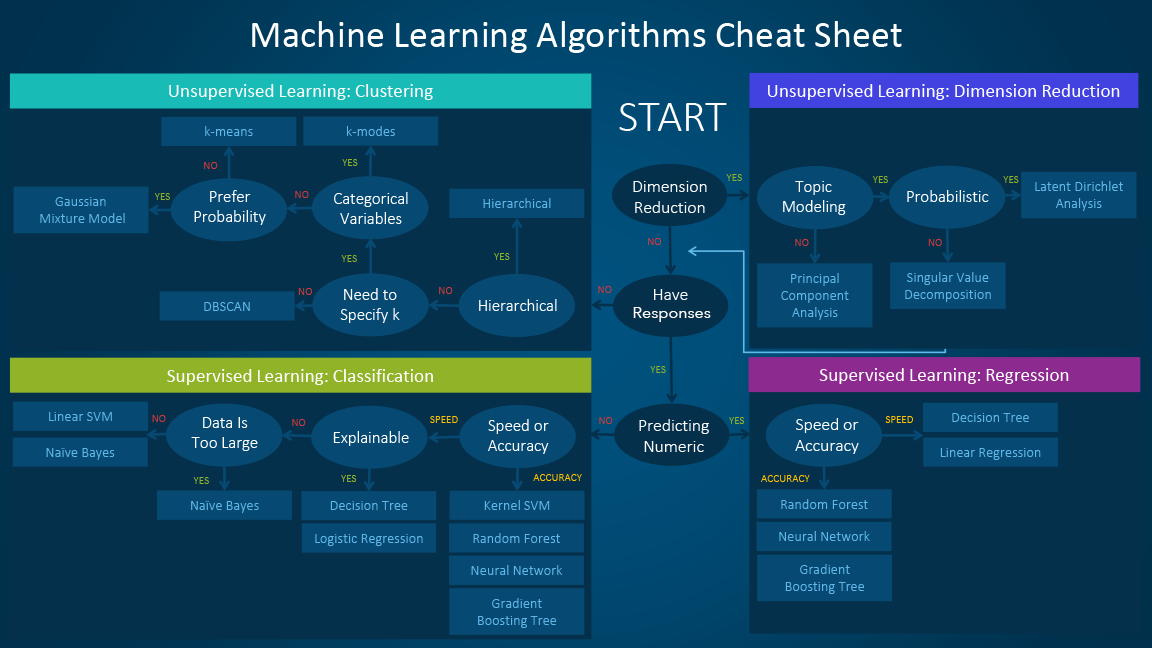

